In [113]:
import pandas as pd
import numpy as np 
import seaborn as sns
import re

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import urllib.request
from PIL import Image

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [114]:
train = pd.read_csv('./precio-de-las-laptop/train.csv')
test = pd.read_csv('./precio-de-las-laptop/test.csv')

In [115]:
# train['Weight'] = [elem[:-2:] for elem in train['Weight']]
# train['Weight'] = pd.to_numeric(train['Weight'])

In [116]:
train['Ram'] = [elem[:-2:] for elem in train['Ram']]
train['Ram'] = pd.to_numeric(train['Ram'])

In [117]:
train['Memory_Type'] = 0

for i in range(len(train['Memory'])):
    if re.search(r'\bSSD', train['Memory'][i]):
        train['Memory_Type'][i] = 1 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [118]:
train['ScreenResolutionType'] = 0
for i in range(len(train['ScreenResolution'])):
    train['ScreenResolutionType'][i] = re.sub('[0-9]+[x][0-9]+', '', train['ScreenResolution'][i])

train['Touchscreen'] = 0
x = 'Touchscreen'

for i in range(len(train['ScreenResolutionType'])):
    if x in train['ScreenResolutionType'][i]:
        train['Touchscreen'][i] = 1

train['HD'] = 0
x = 'HD'

for i in range(len(train['ScreenResolutionType'])):
    if x in train['ScreenResolutionType'][i]:
        train['HD'][i] = 1


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [119]:
train['Mobile'] = 0
train['Discrete'] = 0

x = 'Intel'
y = 'Nvidia'
z = 'AMD Radeon'

for i in range(len(train['Gpu'])):
    if x in train['Gpu'][i]:
        train['Mobile'][i] = 1
    if y in train['Gpu'][i]:
        match =  re.match('\d+[M]' , train['Gpu'][i])
        if match == True :
            train['Mobile'][i] = 1
        else:
            train['Mobile'][i] = 1
    if y in train['Gpu'][i]:
        match =  re.match('[M]\d+' , train['Gpu'][i])
        if match == True:
            train['Mobile'][i] = 1
        else:
            train['Discrete'][i] = 1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

In [120]:
# CPU 
# train['Cpu'].unique()
train['cpu_GHz'] = 0

for i in range(len(train['cpu_GHz'])):
    train['cpu_GHz'][i] = re.findall('(?:\d+\.)?\d+[G][H][z]', train['Cpu'][i])  

train['cpu_GHz'] = [elem[0][:-3:] for elem in train['cpu_GHz']]
train['cpu_GHz'] = pd.to_numeric(train['cpu_GHz'])


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [121]:
x = train[['Ram', 'Inches', 'Memory_Type', 'Mobile', 'Discrete','cpu_GHz', 'Touchscreen','HD']]

In [122]:
comp_dummies = pd.get_dummies(train['TypeName'])
x = pd.concat([x, comp_dummies], axis=1)

In [123]:
y = train['Price_euros']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [124]:
scaler = StandardScaler()
scaler.fit(x)
x_scale = scaler.transform(x)

In [125]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Price_euros'>

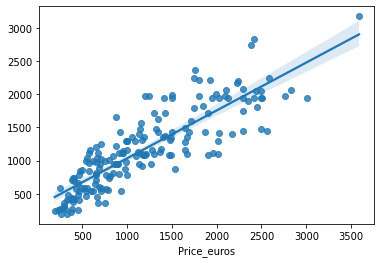

In [126]:
y_pred = lm.predict(x_test)
sns.regplot(y_test, y_pred)

In [127]:
# print('MAE:', mean_absolute_error(y_train, lm.predict(x_train)))
# print('MSE:', mean_squared_error(y_train, lm.predict(x_train)))
# print('RMSE:', np.sqrt(mean_squared_error(y_train, lm.predict(x_train))))

# print('MAE test:', mean_absolute_error(y_test, lm.predict(x_test)))
# print('MSE test:', mean_squared_error(y_test, lm.predict(x_test)))
# print('RMSE test:', np.sqrt(mean_squared_error(y_test, lm.predict(x_test))))

In [128]:
print('MAE:', mean_absolute_error(y_train, lm.predict(x_train)))
print('MSE:', mean_squared_error(y_train, lm.predict(x_train)))
print('RMSE:', np.sqrt(mean_squared_error(y_train, lm.predict(x_train))))

print('MAE test:', mean_absolute_error(y_test, lm.predict(x_test)))
print('MSE test:', mean_squared_error(y_test, lm.predict(x_test)))
print('RMSE test:', np.sqrt(mean_squared_error(y_test, lm.predict(x_test))))

MAE: 278.16160176256284
MSE: 154630.328928052
RMSE: 393.23063070932307
MAE test: 274.5764897063529
MSE test: 131342.39533753032
RMSE test: 362.41191390119934


In [129]:
test

,id,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,1184,HP,Pavilion 15-BC000nv,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,6GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.18kg
1,815,Lenovo,Thinkpad T470s,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.32kg
2,1244,HP,EliteBook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.54kg
3,1121,HP,Spectre Pro,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.16kg
4,443,Lenovo,IdeaPad 320-15IAP,Notebook,15.6,Full HD 1920x1080,Intel Pentium Quad Core N4200 1.1GHz,4GB,128GB SSD,Intel HD Graphics 505,Windows 10,2.2kg
...,...,...,...,...,...,...,...,...,...,...,...,...
386,739,Acer,Aspire ES1-572,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.4kg
387,360,HP,250 G6,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,1.86kg
388,965,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg
389,82,HP,ProBook 440,Notebook,14.0,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.63kg


In [130]:
# test['Weight'] = [elem[:-2:] for elem in test['Weight']]
# test['Weight'] = pd.to_numeric(test['Weight'])
test['Ram'] = [elem[:-2:] for elem in test['Ram']]
test['Ram'] = pd.to_numeric(test['Ram'])

In [131]:
test['Memory_Type'] = 0

for i in range(len(test['Memory'])):
    if re.search(r'\bSSD', test['Memory'][i]):
        test['Memory_Type'][i] = 1 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [132]:
test['ScreenResolutionType'] = 0
for i in range(len(test['ScreenResolution'])):
    test['ScreenResolutionType'][i] = re.sub('[0-9]+[x][0-9]+', '', test['ScreenResolution'][i])

test['Touchscreen'] = 0
x = 'Touchscreen'

for i in range(len(test['ScreenResolutionType'])):
    if x in test['ScreenResolutionType'][i]:
        test['Touchscreen'][i] = 1

test['HD'] = 0
x = 'HD'

for i in range(len(test['ScreenResolutionType'])):
    if x in test['ScreenResolutionType'][i]:
        test['HD'][i] = 1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [133]:
test['Mobile'] = 0
test['Discrete'] = 0

x = 'Intel'
y = 'Nvidia'
z = 'AMD Radeon'

for i in range(len(test['Gpu'])):
    if x in test['Gpu'][i]:
        test['Mobile'][i] = 1
    if y in test['Gpu'][i]:
        match =  re.match('\d+[M]' , test['Gpu'][i])
        if match == True :
            test['Mobile'][i] = 1
        else:
            test['Mobile'][i] = 1
    if y in test['Gpu'][i]:
        match =  re.match('[M]\d+' , test['Gpu'][i])
        if match == True:
            test['Mobile'][i] = 1
        else:
            test['Discrete'][i] = 1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [134]:
# CPU 
# test['Cpu'].unique()
test['cpu_GHz'] = 0

for i in range(len(test['cpu_GHz'])):
    test['cpu_GHz'][i] = re.findall('(?:\d+\.)?\d+[G][H][z]', test['Cpu'][i])  

test['cpu_GHz'] = [elem[0][:-3:] for elem in test['cpu_GHz']]
test['cpu_GHz'] = pd.to_numeric(test['cpu_GHz'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [135]:
x_test = test[['Ram', 'Inches', 'Memory_Type', 'Mobile', 'Discrete','cpu_GHz', 'Touchscreen','HD']]

In [136]:
comp_dummies = pd.get_dummies(test['TypeName'])
x_test = pd.concat([x_test, comp_dummies], axis=1)

In [137]:
x_test_scaled = scaler.transform(x_test)

In [138]:
predictions_submit = lm.predict(x_test)
predictions_submit

array([ 714.14795879, 1470.81270976,  782.61366076, 1098.03127171,
        487.2115303 ,  993.653525  ,  337.19394253,  853.92756324,
       1193.82204591, 1096.23144791, 1027.72745817, 1109.68341247,
        405.61086156, 2219.21584974, 1212.55327123, 1360.42235191,
        891.3746235 ,  867.17853924,  903.02281079,  475.56334302,
        539.6441361 , 1972.54467373, 1111.50948492,  527.74972138,
       1159.98872415, 1088.67482167,  384.22469004,  475.56334302,
       1949.82186649, 3196.90117337,  384.22469004, 1949.82186649,
        611.12283076,  252.5802811 ,  948.69213728, 1949.82186649,
       1291.91836217,  909.83487305,  649.89950919, 1011.82770762,
       1748.80503777, 1158.62730313, 1470.81270976,  345.10190084,
       1984.51823577,  983.85795549, 1360.42235191, 1972.54467373,
       1112.95797664,  821.50921275,  611.12283076, 2831.33817156,
        739.75424701,  730.82404202, 1710.50227683,  890.01320249,
        535.17672104, 1131.48129925,  948.69213728, 1972.54467

In [139]:
submission = pd.DataFrame({"id": test['id'], "Price_euros": predictions_submit})

In [140]:
# submission.to_csv("./sample_submission.csv")

In [141]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == submission.shape:
        if df_to_submit.columns.all() == submission.columns.all():
            if df_to_submit.id.all() == submission.id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")

In [142]:
chequeator(submission)

You're ready to submit!


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1076)>